In [1]:
# pipenv install pandas seaborn plotly scikit-learn matplotlib ipywidgets ipykernel streamlit

# EDA e visualização de Dados
import pandas as pd
import plotly.express as px
import seaborn as sns

# ML / tSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE

### Carregar os Dados

In [2]:
### Carregar DataFrame
df_cosmeticos = pd.read_csv('./datasets/cosmeticos.csv')

In [3]:
# Visualizar a Estrutura
df_cosmeticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [4]:
# Visualizar os primeiros registros
df_cosmeticos.head(10)

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


In [5]:
# Visualizar últimos registros
df_cosmeticos.tail(10)

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
1462,Sun protect,COOLA,Summer Duo,36,4.8,Visit the COOLA boutique,0,0,0,0,0
1463,Sun protect,VITA LIBERATA,Passionflower & Argan Dry Oil Broad Spectrum S...,45,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil*, C...",0,0,0,0,0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1
1465,Sun protect,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,34,4.1,-Pepha® (derived from watermelon extract): Pro...,0,0,0,0,0
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


### EDA

In [6]:
# Transformar valores da coluna 'Ingredientes' em um novo DataFrame

df_cosmeticos_eda = df_cosmeticos.copy()
df_cosmeticos_eda = df_cosmeticos_eda['Ingredientes'].str.split(',')

In [7]:
df_cosmeticos_eda

0       [Algae (Seaweed) Extract,  Mineral Oil,  Petro...
1       [Galactomyces Ferment Filtrate (Pitera),  Buty...
2       [Water,  Dicaprylyl Carbonate,  Glycerin,  Cet...
3       [Algae (Seaweed) Extract,  Cyclopentasiloxane,...
4       [Water,  Snail Secretion Filtrate,  Phenyl Tri...
                              ...                        
1467    [Water,  Alcohol Denat.,  Potassium Cetyl Phos...
1468    [Water,  Isododecane,  Dimethicone,  Butylocty...
1469    [Water,  Dihydroxyacetone,  Glycerin,  Scleroc...
1470    [Water,  Dihydroxyacetone,  Propylene Glycol, ...
1471                      [Visit the DERMAFLASH boutique]
Name: Ingredientes, Length: 1472, dtype: object

In [8]:
df_ingredientes = df_cosmeticos_eda.explode('Ingredientes')
df_ingredientes

0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                     ...              
45811           Alpha-isomethyl Ionone
45812                 CI 14700 (Red 4)
45813              CI 19140 (Yellow 5)
45814               CI 42090 (Blue 1).
45815    Visit the DERMAFLASH boutique
Name: Ingredientes, Length: 45816, dtype: object

#### Analise Univariada 

In [9]:
# Estatísticas das Variáveis
df_cosmeticos.describe()

,Preco,Rating,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Distribuição de variável Tipo
percentual_tipo = df_cosmeticos.value_counts('Tipo') / len(df_cosmeticos) * 100
percentual_tipo = percentual_tipo.reset_index()
percentual_tipo.columns = ['Tipo', 'Percentual']

fig = px.bar(percentual_tipo, x='Tipo', y='Percentual', color='Tipo', text='Percentual')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
fig.show()

In [11]:
# Distribuição de variável Marca
percentual_marca = df_cosmeticos.value_counts('Marca') / len(df_cosmeticos) * 100
percentual_marca = percentual_marca.reset_index()
percentual_marca.columns = ['Marca', 'Percentual']

fig = px.bar(percentual_marca.head(10), x='Percentual', y='Marca', color='Marca', text='Percentual', orientation='h')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
fig.show()

In [12]:
# Quantidade de Marcas
len(df_cosmeticos['Marca'].unique())

116

In [13]:
# Distribuição de variável Ingrediente
percentual_ingrediente = df_ingredientes.value_counts('Ingrediente') / len(df_ingredientes) * 100
percentual_ingrediente = percentual_ingrediente.reset_index()
percentual_ingrediente.columns = ['Ingrediente', 'Percentual']

fig = px.bar(percentual_ingrediente.head(10), x='Percentual', y='Ingrediente', color='Ingrediente', text='Percentual', orientation='h')

# Atualizar o Plot para melhor visualizar os labels
fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
fig.show()

In [14]:
# Quantidade de Ingredientes
len(percentual_ingrediente['Ingrediente'].unique())

7298

In [15]:
# Distribuição da variável Preço
px.histogram(df_cosmeticos['Preco'], title='Histograma da variável Preço')

In [16]:
# Distribuição da variável Rating
px.histogram(df_cosmeticos['Rating'], title='Histograma da variável Rating')

### Analise Bivariada

In [17]:
# BoxPlot de distribuição de por tipo e preço
px.box(df_cosmeticos, x='Preco', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [18]:
# BoxPlot de distribuição de por rating e preço
px.box(df_cosmeticos, x='Rating', y='Tipo', color='Tipo', orientation='h', hover_data=['Marca', 'Nome'])

In [19]:
# Correlação Preço e Rating
px.scatter(df_cosmeticos, x='Preco', y='Rating', color='Tipo', hover_data=['Marca', 'Nome'])

In [20]:
# Gerar Matriz de Correlação
matriz_correlacao_cosmeticos = df_cosmeticos.corr(numeric_only=True)

<Axes: >

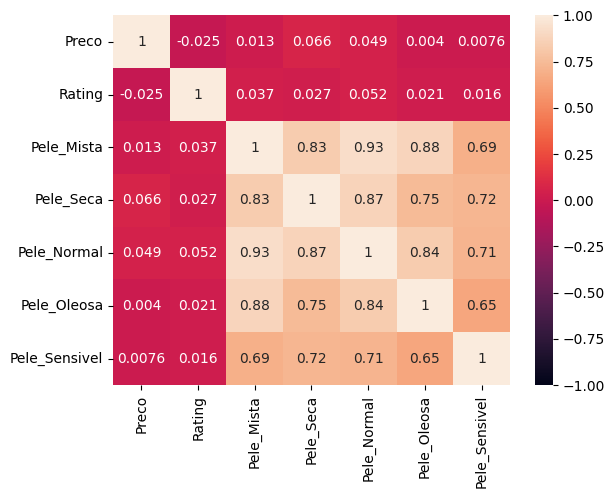

In [21]:
# Plotar matriz de correlação
sns.heatmap(matriz_correlacao_cosmeticos, vmin=-1, vmax=1, annot=True)

### Treinar o algoritmo t-SNE

In [22]:
# COpiar Dataframe original
X = df_cosmeticos.copy()
X.drop(columns=['Nome', 'Ingredientes'], axis=1, inplace=True)

In [23]:
# Separando variáveis numéricas e categóricas
numeric_features = ['Rating', 'Preco']
categorical_features = ['Marca', 'Tipo']

In [24]:
# Definir as transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [25]:
# Criar Pre Processor de Transformação
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [26]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [27]:
# Visualizar Dados
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10368 stored elements and shape (1472, 129)>

In [28]:
# Armazenar resultados do t-SNE em DataFrame
results_df = pd.DataFrame()

In [29]:
# Loop de treinamento do algoritmo, mudando o parâmetro perplexity
for perplexity in range(5, 51, 1):

    # Criar e treinar modelo
    tsne = TSNE(n_components=2, perplexity=perplexity, init='random', max_iter=250, random_state=51)
    tsne_results = tsne.fit_transform(X_transformed)

    # Armazenar Resultados
    temp_df = pd.DataFrame(tsne_results, columns=['Componente 1', 'Componente 2'])
    temp_df['Perplexity'] = perplexity
    results_df = pd.concat([results_df, temp_df], axis=0)


In [30]:
results_df.head(10)

,Componente 1,Componente 2,Perplexity
0,-0.710638,-0.423158,5
1,-0.809765,-0.406724,5
2,0.870369,0.001945,5
3,-0.723441,-0.412023,5
4,1.150492,-0.392882,5
5,0.242853,-0.371905,5
6,0.864858,-0.011761,5
7,0.867014,0.000858,5
8,1.204632,-0.238413,5
9,-1.309920,0.374899,5


In [31]:
# Reset no índice para realizar plot
results_df.reset_index(drop=True, inplace=True)

### Visualizar Resultados

In [32]:
# Criar um Scatterplot Animado com variação no Perplexity
fig = px.scatter(results_df, x='Componente 1', y='Componente 2', animation_frame='Perplexity', title='Visualização do t-SNE com variação do Perplexity')

fig.show()